## Machine learning

Unsupervised learning
- dimension resuction
- clustering

Supervised learning
- categorical response
- continuous response

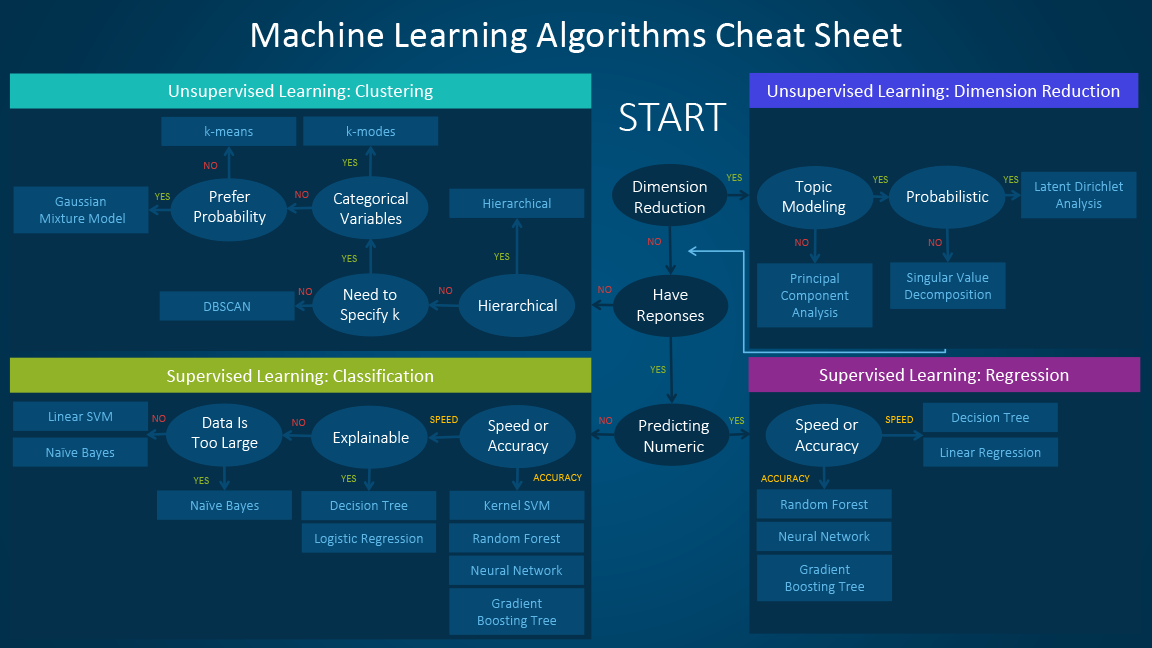



## Basic example for name classification using NLTK


In [ ]:
def gender_features(word):
    return {'last_letter': word[-1]}
gender_features('Iulia')

In [ ]:
import nltk
nltk.download('names')
from nltk.corpus import names
import random
names = ([(name, 'male') for name in names.words('male.txt')] + [(name, 'female') for name in names.words('female.txt')])
random.shuffle(names)
featuresets = [(gender_features(n), g) for (n,g) in names]







In [ ]:
from nltk.classify import apply_features # use apply if you're working with large corpora
# Split into training and test sets
train_set = apply_features(gender_features, names[500:]) 
test_set = apply_features(gender_features, names[:500])
# Train the classsifier
classifier = nltk.NaiveBayesClassifier.train(train_set)
# Evaluate classifier
print(nltk.classify.accuracy(classifier, test_set))

In [ ]:
classifier.classify(gender_features('Neo'))

In [ ]:
classifier.classify(gender_features('Trinity'))

In [ ]:
classifier.show_most_informative_features(10)

## Classifying tweets by sentiment

Your task is to analyse the sentiment in recent tweets about Brexit. Think about how you might do that, now that we have the actual tweets. What else do we need? 

Now that our tweets have been processed we can  work with the smaller file, and get the data ready for coding.  

In [ ]:
import os
os.chdir("C:/Code/teaching")
import pandas as pd
with open("brexit_tweets_selected_fields_april_1.csv", "r") as tweet_file:
    df=pd.read_csv(tweet_file, encoding="utf-8")    
# keep original tweets
# df_no_rt=df[df["retweeted_status_id"]=="none"]
# select a sample to code [1000]            
sample=df.sample(1000)    
# divide into 300 for expert coders and 700 for crowd
sample_experts = sample.iloc[:300, :]
sample_crowd = sample.iloc[300:, :]
# Save sample for using with CF. 
sample_experts.to_csv("sample_experts_april_1.csv", index=False)
sample_crowd.to_csv("sample_crowd_april_1.csv", index=False)

## Designing crowdsourcing job
Figure8, Amazon Mechanical Turk, etc. 



## Using pre-labelled data
We don't have the time (or money) to code them now, so let's use some data which has already been coded. Using the labelled data from: https://github.com/lesley2958/twilio-sent-analysis 


In [ ]:
import pandas as pd

text_pos = []
labels_pos = []
with open("pos_tweets.txt", 'r', encoding="utf8") as f:
    for i in f: 
        text_pos.append(i) 
        labels_pos.append('pos')
        

text_neg = []
labels_neg = []
with open("neg_tweets.txt", 'r', encoding="utf8") as f:
    for i in f: 
        text_neg.append(i)
        labels_neg.append('neg')

In [ ]:
text_all=[]
labels_all=[]
text_all=text_pos+text_neg
labels_all=labels_pos+labels_neg

In [ ]:
train_data = pd.DataFrame()
train_data["text"]=text_all
train_data["labels"]=labels_all

In [ ]:
train_data.head()

In [ ]:
#Import required packages
import numpy as np
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Prepare data for sklearn. First, we need to get the "class" variable
labels = train_data['labels']

# Second, we need to vectorize
vectorizer = CountVectorizer()



In [ ]:
# Transform the text data using the chosen vectorizer
X = vectorizer.fit_transform(train_data["text"])
y = np.array(labels) # sklearn wants numpy arrays!


In [ ]:

# Classify. Initialize the classifer
clf = MultinomialNB()

# Fit the model
clf_fit = clf.fit(X, y)

# We can print in-sample fit
print("In-sample accuracy = %s" % clf_fit.score(X, y))



In [ ]:
#--------------------------------
# Out-of-sample accuracy

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)

print("Training set size = %s" % y_train.shape)
print("Testing set size = %s" % y_test.shape)

# Initialize the classifer
clf = MultinomialNB()

# Fit the model
clf_fit = clf.fit(X_train, y_train)

# Generate predictions
y_predict = clf_fit.predict(X_test)

# We can print out-of-sample fit
print("Out-of-sample accuracy = %s" %  accuracy_score(y_test, y_predict))
